# Lane Finding Pipeline

In [1]:
import numpy as np
import cv2
import segment_image as seg
from ipm import inverse_perspective_mapping
import matplotlib.pyplot as plt
import find_lane_lines as lanelines
#from find_lane_lines import find_window_centroids
#from find_lane_lines import plot_window_centroids
import glob

%matplotlib inline

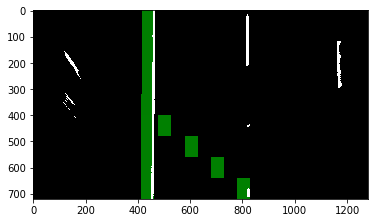

In [2]:
window_width = 50
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

# Read in an image
img = cv2.imread('test_images/straight_lines1.jpg')

# Transform to inverse perspective mapping
ipm_img = inverse_perspective_mapping(img)

# Segmentation pipeline
seg_img = seg.segmentation_pipeline(ipm_img)

# Find lanes
window_centroids = lanelines.find_window_centroids(seg_img, window_width, window_height, margin)

output = lanelines.plot_window_centroids(seg_img, window_centroids, window_width, window_height)

plt.imshow(output)



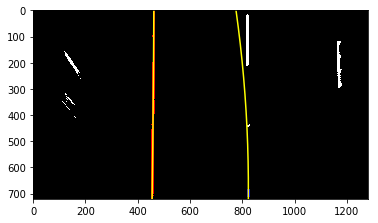

In [3]:
left_fit, right_fit, left_idx, right_idx, nzx, nzy = lanelines.find_lane_fit(seg_img)

lanelines.plot_lane_fit(seg_img, left_fit, right_fit, left_idx, right_idx, nzx, nzy)